# <진행할 분류 문제>
## 1. 손글씨를 분류해 봅시다.
## 2. 와인을 분류해 봅시다.
## 3. 유방암 여부를 진단해 봅시다. 
-------------------------------------------------

# 1. 손글씨를 분류해 봅시다. 
## (1) 필요한 모듈 import하기

In [466]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [467]:
#손글씨 데이터 가져오기
digits = load_digits()

## (3) 데이터 이해하기

In [468]:
#digits관련 method 확인하기
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [469]:
#데이터를 digits_data 변수에 저장하기
digits_data = digits.data

In [470]:
#digits_data 크기 확인하기
digits_data.shape
#1797개의 데이터와 64개의 특징(픽실)으로 이루어짐

(1797, 64)

In [471]:
#digits_data 중 하나의 행 값 출력하기
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [472]:
#타겟(라벨)을 digits_label 변수에 저장하기
digits_label = digits.target

In [473]:
#digits_label 크게 확인하기
digits_label.shape
#1797개의 정답 존재

(1797,)

In [474]:
#digits 타겟 이름 확인하기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [475]:
#digits 칼럼 이름 확인하기
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [476]:
# digits의 destcribe 확인하기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

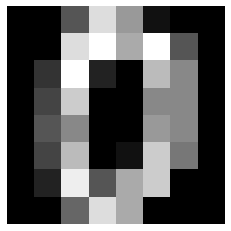

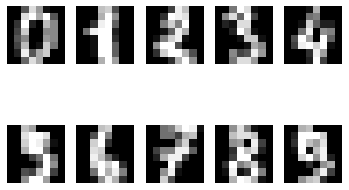

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [477]:
# digits 데이터를 그림으로 시각화하기
import matplotlib.pyplot as plt

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해준다. 
plt.show() 

digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미한다.
print(digits_label.shape)
digits_label[:20]

## (4) train, test 데이터 분리

In [478]:
#digits 데이터를 데이터프레임으로 바꾸기
import pandas as pd

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)

In [479]:
#digits_df에 타겟값 칼럼 추가하기
digits_df["label"] = digits.target

In [480]:
#digits 데이터프레임 확인하기 
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [481]:
#훈련데이터와 평가데이터를 2:8로 나누기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [482]:
#훈련데이터 갯수와 평가데이터의 갯수
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


In [483]:
#훈련데이터 크기 확인
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [484]:
#평가데이터 크기 확인
X_test.shape, y_test.shape

((360, 64), (360,))

In [485]:
#잘 섞였는지 형상 정보 확인
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

## (5) 다양한 모델로 학습시키기고 평가하기
### a. 의사결정트리

In [486]:
#의사결정트리 모듈 임포트
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
print(decision_tree._estimator_type)

classifier


In [487]:
#훈련데이터로 학습시키기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [488]:
# 평가데이터로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 3, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 5, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 2, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 2, 7,
       7, 2, 2, 4, 5, 5, 4, 6, 2, 0, 3, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 4,
       3, 7, 6, 3, 1, 5, 6, 2, 1, 0, 1, 1, 4, 5, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 9, 0, 9, 3, 1, 2, 2,
       3, 6, 9, 4, 0, 1, 8, 3, 9, 1, 0, 8, 5, 0, 7, 2, 7, 4, 4, 9, 2, 2,
       6, 0, 4, 4, 9, 5, 0, 2, 4, 4, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 9, 6,
       8, 4, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 8, 1, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 8, 5, 5, 3, 6, 6, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 6, 4, 7, 9, 5, 3, 6, 2, 5, 2, 5, 9, 3, 9, 9,
       2, 2, 1, 6, 4, 1, 7, 5, 9, 8, 9, 5, 7, 4, 3, 7, 4, 8, 2, 8, 9, 5,
       3, 2, 1, 0, 4, 2, 1, 0, 1, 4, 1, 7, 6, 4, 7, 7, 9, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 2, 1, 1, 0, 2,

In [489]:
#실제값 확인하기
y_test

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [490]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [491]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.8555555555555555
0.8612430399135256
0.8582688615148293
0.8563581153550206


In [492]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[42,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  3,  1,  0,  1,  1,  0,  0,  2],
       [ 0,  0, 33,  2,  0,  0,  1,  1,  2,  1],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  1,  0, 27,  0,  2],
       [ 0,  5,  4,  1,  1,  0,  3,  0, 28,  1],
       [ 0,  1,  1,  2,  2,  1,  0,  0,  0, 25]])

### b. 랜덤포레스트 

In [493]:
#랜덤포레스트 모듈 임포트하기
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32) 

In [494]:
#훈련데이터로 학습시키기
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [495]:
# 평가데이터로 예측하기
y_pred = random_forest.predict(X_test) 
y_pred

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 5, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 5, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 4, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 8, 5, 9, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       7, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 7, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [496]:
#실제값 확인하기
y_test

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [497]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [498]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9638888888888889
0.9649721886640492
0.9637009803921568
0.9631760446773028


In [499]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  3,  0,  0,  1,  1,  0,  2, 36,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 30]])

### c. Support Vector Machine(SVM)

In [500]:
#svm 모듈 임포트
from sklearn import svm 
svm_model = svm.SVC() 
print(svm_model._estimator_type) 

classifier


In [501]:
#훈련데이터로 학습시키기
svm_model.fit(X_train, y_train) 

SVC()

In [502]:
# 평가데이터로 예측하기
y_pred = svm_model.predict(X_test) 
y_pred

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 5, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [503]:
#실제값 확인하기
y_test

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [504]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [505]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9888888888888889
0.9898982558139535
0.9887878787878789
0.9890243833239554


In [506]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

### d. Stochastic Gradient Descent Classifier (SGDClassifier)

In [507]:
#SGD분류기 임포트하기
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 
print(sgd_model._estimator_type)

classifier


In [508]:
#훈련데이터로 학습시키기
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [509]:
#평가데이터로 예측하기
y_pred = sgd_model.predict(X_test)
y_pred

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 5, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 3, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 7, 5, 6, 2, 1, 0, 1, 9, 4, 1, 9, 3, 3, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 2, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 8, 9, 8, 2,
       6, 0, 4, 4, 1, 5, 0, 2, 4, 1, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 9, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 3, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [510]:
#실제값 확인
y_test

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [511]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.88      0.89        42
           2       0.95      1.00      0.98        40
           3       0.89      0.97      0.93        34
           4       0.97      1.00      0.99        37
           5       0.96      0.96      0.96        28
           6       1.00      0.93      0.96        28
           7       0.97      0.97      0.97        33
           8       0.97      0.88      0.93        43
           9       0.94      0.97      0.95        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [512]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9555555555555556
0.956656565903317
0.9568131676925002
0.9561041221697686


In [513]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  1,  3,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 26,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  1,  0,  1,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

### e. Logistic Regression

In [514]:
# 선형회귀 임포트하기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression() 
print(logistic_model._estimator_type) 

classifier


In [515]:
#훈련데이터로 학습하기
logistic_model.fit(X_train, y_train) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [516]:
#평가데이터로 에측하기
y_pred = logistic_model.predict(X_test)
y_pred

array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 5, 1, 8, 5, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 7, 5, 6, 2, 1, 0, 1, 9, 4, 1, 9, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 1, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 8, 9, 8, 2,
       6, 0, 4, 4, 5, 5, 0, 2, 4, 6, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 8, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 8, 7, 5, 7, 8, 5, 5, 7, 4, 3, 7, 5, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [517]:
#실제값 확인하기
y_test

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [518]:
# 결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [519]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9527777777777777
0.9541441074315562
0.9520130147986373
0.9519666134152143


In [520]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  1,  0,  1,  4,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 29]])

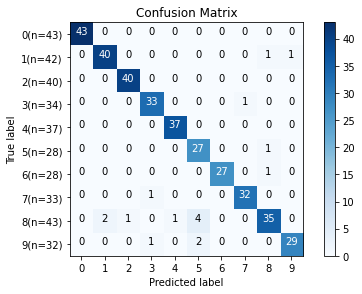

In [521]:
# confusion matrix 을 위한 라이브러리
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import product

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#메인 실행 
confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix, labels=digits.target_names, normalize=False)

## (6) 결론
손글씨 데이터는 숫자 3이라고 예측했는데 3이 아닌 경우도 중요하고 3이 아닌데 3이라고 예측하는 것도 중요하기 때문에 일반적으로 많이 사용하는 __Accracy__ 혹은 Precision과 Recall를 조화롭게 평균을 낸 __F1 Score__ 가 평가 지표에 중요하다.  

머신러닝 모델 중에서는 __Support Vector Machine(SVM)__ 모델의 정확도가 약 0.99로 가장 점수가 높았으며 다음으로는 __랜덤포레스트__ 모델이 0.96, __logistic reggresion__ 모델이 0.95, __SGDClassifier__ 모델이 0.93, __의사결정트리__ 모델이 0.86점이었다. 

-----------------

# 2. 와인을 분류해 봅시다.

## (1) 필요한 모듈 import하기

In [522]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [523]:
#와인 데이터 가져오기
wine = load_wine()

## (3) 데이터 이해하기

In [524]:
#wine관련 method 확인하기
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [525]:
#데이터를 wine_data 변수에 저장하기
wine_data = wine.data

In [526]:
#wine_data 크기 확인하기
wine_data.shape
#178개의 데이터와 13개의 특징으로 이루어짐

(178, 13)

In [527]:
#wine_data 중 하나의 행 값 출력하기
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [528]:
#타겟(라벨)을 wine_label 변수에 저장하기
wine_label = wine.target

In [529]:
#wine_label 크게 확인하기
wine_label.shape
#178개의 정답 존재

(178,)

In [530]:
#wine 타겟 이름 확인하기
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [531]:
#wine 칼럼 이름 확인하기
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [532]:
# wine의 destcribe 확인하기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## (4) train, test 데이터 분리

In [533]:
#wine 데이터를 데이터프레임으로 바꾸기
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)

In [534]:
#wine_df에 타겟값 칼럼 추가하기
wine_df["label"] = wine.target

In [535]:
#wine 데이터프레임 확인하기 
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [536]:
#훈련데이터와 평가데이터를 2:8로 나누기
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [537]:
#훈련데이터 갯수와 평가데이터의 갯수
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [538]:
#훈련데이터 크기 확인
X_train.shape, y_train.shape

((142, 13), (142,))

In [539]:
#평가데이터 크기 확인
X_test.shape, y_test.shape

((36, 13), (36,))

In [540]:
#잘 섞였는지 형상 정보 확인
y_train, y_test

(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

## (5) 다양한 모델로 학습시키기고 평가하기
### a. 의사결정트리

In [541]:
#의사결정트리 모듈 임포트
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
print(decision_tree._estimator_type)

classifier


In [542]:
#훈련데이터로 학습시키기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [543]:
# 평가데이터로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [544]:
#실제값 확인하기
y_test

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [545]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [546]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9444444444444444
0.9444444444444445
0.9649122807017544
0.9511784511784511


In [547]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 7,  0,  0],
       [ 0, 17,  0],
       [ 0,  2, 10]])

### b. 랜덤포레스트 

In [548]:
#랜덤포레스트 모듈 임포트하기
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32)

In [549]:
#훈련데이터로 학습시키기
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [550]:
# 평가데이터로 예측하기
y_pred = random_forest.predict(X_test) 
y_pred

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [551]:
#실제값 확인하기
y_test

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [552]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [553]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

1.0
1.0
1.0
1.0


In [554]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 7,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 12]])

### c. Support Vector Machine(SVM)

In [555]:
#svm 모듈 임포트
from sklearn import svm 
svm_model = svm.SVC() 
print(svm_model._estimator_type) 

classifier


In [556]:
#훈련데이터로 학습시키기
svm_model.fit(X_train, y_train) 

SVC()

In [557]:
# 평가데이터로 예측하기
y_pred = svm_model.predict(X_test) 
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2])

In [558]:
#실제값 확인하기
y_test

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [559]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



In [560]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.6111111111111112
0.607609710550887
0.589133089133089
0.5627168696936139


In [561]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 6,  0,  1],
       [ 1, 15,  1],
       [ 0, 11,  1]])

### d. Stochastic Gradient Descent Classifier (SGDClassifier)

In [562]:
#SGD분류기 임포트하기
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 
print(sgd_model._estimator_type)

classifier


In [563]:
#훈련데이터로 학습시키기
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [564]:
#평가데이터로 예측하기
y_pred = sgd_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [565]:
#실제값 확인
y_test

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [566]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.71      0.88      0.79        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.39      0.63      0.48        36
weighted avg       0.43      0.61      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [567]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.6111111111111112
0.6274509803921569
0.39365079365079364
0.4752791068580542


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [568]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 7,  0,  0],
       [ 2, 15,  0],
       [ 6,  6,  0]])

### e. Logistic Regression

In [569]:
# 선형회귀 임포트하기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression() 
print(logistic_model._estimator_type)

classifier


In [570]:
#훈련데이터로 학습하기
logistic_model.fit(X_train, y_train) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [571]:
#평가데이터로 에측하기
y_pred = logistic_model.predict(X_test)
y_pred

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1])

In [572]:
#실제값 확인하기
y_test

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [573]:
# 결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



In [574]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9722222222222222
0.9523809523809524
0.9814814814814815
0.9648351648351648


In [575]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 6,  1,  0],
       [ 0, 17,  0],
       [ 0,  0, 12]])

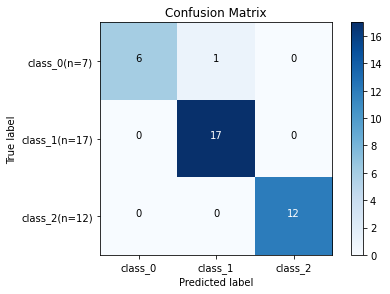

In [576]:
# confusion matrix 을 위한 라이브러리
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import product

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#메인 실행 
confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix, labels=wine.target_names, normalize=False)

## (6) 결론
와인 데이터는 기업의 입장에서 A와인인데 A와인이 아니라고 예측하는 것보다 A와인이 아닌데 A와인으로 예측하여 물품을 보내는 것이 더 중요한 문제이기 때문에 __Precision__ 이 더 중요한 평가 지표다.

머신러닝 모델 중에서는  __랜덤포레스트__ 모델이 1로 가장 점수가 높았으며 다음으로는 __logistic reggresion__ 모델이 약 0.98점, __의사결정트리__ 모델이 약 0.96점, __SGDClassifier__ 모델이 약 0.79점,__Support Vector Machine(SVM)__ 모델의 정밀도가 약 0.59점이었다. 


-----------------

# 3. 유방암 여부를 진단해 봅시다. 
## (1) 필요한 모듈 import하기

In [577]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [578]:
#유방암 데이터 가져오기
breast_cancer = load_breast_cancer()

## (3) 데이터 이해하기

In [579]:
#wine관련 method 확인하기
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [580]:
#데이터를 breast_cancer_data 변수에 저장하기
breast_cancer_data = breast_cancer.data

In [581]:
#breast_cancer_data 크기 확인하기
breast_cancer_data.shape
#569개의 데이터와 30개의 특징으로 이루어짐

(569, 30)

In [582]:
#breast_cancer_data 중 하나의 행 값 출력하기
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [583]:
#타겟(라벨)을 breast_cancer_label 변수에 저장하기
breast_cancer_label = breast_cancer.target

In [584]:
#breast_cancer_label 크게 확인하기
breast_cancer_label.shape
#569개의 정답 존재

(569,)

In [585]:
#breast_cancer 타겟 이름 확인하기
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [586]:
#breast_cancer 칼럼 이름 확인하기
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [587]:
# wine의 destcribe 확인하기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## (4) train, test 데이터 분리

In [588]:
#breast_cancer 데이터를 데이터프레임으로 바꾸기
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)

In [589]:
#breast_cancer_df에 타겟값 칼럼 추가하기
breast_cancer_df["label"] = breast_cancer.target

In [590]:
#breast_cancer 데이터프레임 확인하기 
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [591]:
#훈련데이터와 평가데이터를 2:8로 나누기
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state = 42)

In [592]:
#훈련데이터 갯수와 평가데이터의 갯수
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


In [593]:
#훈련데이터 크기 확인
X_train.shape, y_train.shape

((455, 30), (455,))

In [594]:
#평가데이터 크기 확인
X_test.shape, y_test.shape

((114, 30), (114,))

In [595]:
#잘 섞였는지 형상 정보 확인
y_train, y_test

(array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 

## (3) 다양한 모델로 학습시키기고 평가하기
### a. 의사결정트리

In [596]:
#의사결정트리 모듈 임포트
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
print(decision_tree._estimator_type)

classifier


In [597]:
#훈련데이터로 학습시키기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [598]:
# 평가데이터로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [599]:
#실제값 확인하기
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [600]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [601]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9473684210526315
0.9439895185063871
0.9439895185063871
0.9439895185063871


In [602]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[40,  3],
       [ 3, 68]])

### b. 랜덤포레스트 

In [603]:
#랜덤포레스트 모듈 임포트하기
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32) 

In [604]:
#훈련데이터로 학습시키기
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [605]:
# 평가데이터로 예측하기
y_pred = random_forest.predict(X_test) 
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [606]:
#실제값 확인하기
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [607]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [608]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9649122807017544
0.9580740255486406
0.9672569328433009
0.9623015873015873


In [609]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[40,  3],
       [ 1, 70]])

### c. Support Vector Machine(SVM)

In [610]:
#svm 모듈 임포트
from sklearn import svm 
svm_model = svm.SVC() 
print(svm_model._estimator_type) 

classifier


In [611]:
#훈련데이터로 학습시키기
svm_model.fit(X_train, y_train)

SVC()

In [612]:
# 평가데이터로 예측하기
y_pred = svm_model.predict(X_test) 
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [613]:
#실제값 확인하기
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [614]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [615]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9473684210526315
0.9302325581395349
0.961038961038961
0.9422297297297297


In [616]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[37,  6],
       [ 0, 71]])

### d. Stochastic Gradient Descent Classifier (SGDClassifier)

In [617]:
#SGD분류기 임포트하기
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 
print(sgd_model._estimator_type)

classifier


In [618]:
#훈련데이터로 학습시키기
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [619]:
#평가데이터로 예측하기
y_pred = sgd_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [620]:
#실제값 확인
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [621]:
#결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [622]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9736842105263158
0.9651162790697674
0.9797297297297297
0.9715828832571666


In [623]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[40,  3],
       [ 0, 71]])

### e. Logistic Regression

In [624]:
# 선형회귀 임포트하기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression() 
print(logistic_model._estimator_type) 

classifier


In [625]:
#훈련데이터로 학습하기
logistic_model.fit(X_train, y_train) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [626]:
#평가데이터로 에측하기
y_pred = logistic_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [627]:
#실제값 확인하기
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [628]:
# 결과 지표 확인하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [629]:
#결과지표 자세히보기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'macro'))

0.9649122807017544
0.9580740255486406
0.9672569328433009
0.9623015873015873


In [630]:
# confusion matrix 지표 확인하기
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[40,  3],
       [ 1, 70]])

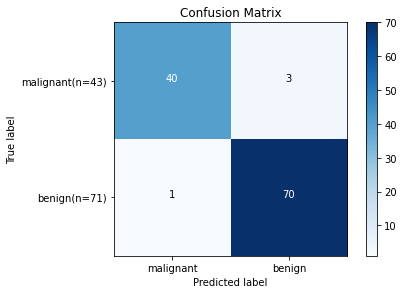

In [631]:
# confusion matrix 을 위한 라이브러리
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import product

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#메인 실행 
confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix, labels=breast_cancer.target_names, normalize=False)

## (4) 결론
유방암 데이터는 암이 아닌데 암이라고 예측하는 것보다 암인데 암이 아니라고 예측하는 것이 중요한 문제이기 때문에 __Recall__ 이 중요한 평가지표가 된다. 

머신러닝 모델 중에서는 __랜덤포레스트__ 모델과 __logistic reggresion__ 모델이 약 0.96점으로 동일하게 점수가 높으며 다음으로, __의사결정트리__ 모델과 __SGDClassifier__ 모델이 동일하게 약 0.94점, __Support Vector Machine(SVM)__ 모델의 재현율이 0.93점이다. 

-----------------

# 프로젝트 진행 회고

## 배운점: 
데이터의 종류에 따라 중요하게 여겨지는 평가지표가 달라진다는 점과 평가 점수가 높게 나오는 모델이 달라진다는 것을 배울 수 있었다. 

흥미로운 점은 와인 데이터와 유방암 데이터의 모델 성능이 _랜덤포레스트>로지스틱회귀>의사결정트리>SGD분류>SVM_ 순으로 동일하다는 점과 손글씨 데이터까지 비교해보면 _랜덤포레스트>로지스틱회귀>의사결정트리_ 순으로 성능이 좋다는 것을 발견할 수 있다는 점이다. 우연의 일치인지 아니면 모델 자체의 성능에 의한 것인지는 더 많은 데이터를 분석해보아야 알 수 있을 것 같다. 하지만 분명한 점은 의사결정트리 모델의 단점을 보안한 것이 랜덤포레스트 모델이기 때문에 이 둘의 성능 차이는 확실하다는 것이다. 

또한 __confusion_matrix__ 를 해석하는 방법과 __classification_report__ 를 해석하는 방법을 팀원들과의 토론과 여러 검색들을 통해서 배웠다.

## 아쉬운점: 
1. 혼동행렬을 사용할 때 매번 import하지 않으면 실행을 하지 않는 오류를 발견하였다. 그 이유는 아직 모르겠다. 
2. 여러 데이터셋과 모델들과 평가지표들을 이 절차에 따라서 분석해보고 싶다. 
3. 각 데이터 별 모델들의 정확도, 재현율, 정밀도, F1스코어 점수의 시각화가 있으면 더 좋았을 것 같다. 

## 종합후기: 
정제된 데이터로 분석을 진행하니 데이터 분석이 훨씬 쉽게 느껴졌고 분석 과정의 절차를 더 확실히 익힐 수 있었다. 그만큼 데이터 전처리 과정과 데이터 분석을 위해 창의적으로 문제점을 생각하는 것이 얼마나 어렵고 시간이 많이 들게 되는 과정인지 다시 상기할 수 있었다. 가장 중요한 것은 여러 가지 평가지표에 대해서 배운 것이 가장 유익했다는 점이다. 

# Reference
1. confusion matrix 해석  
https://nittaku.tistory.com/295  
2. confusion matrix 시각화  
https://panython.tistory.com/20  
3. 모델 평가 지표 참고   
https://bhcboy100.medium.com/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B6%84%EB%A5%98-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%A0%95%ED%99%95%EB%8F%84-%EC%A0%95%EB%B0%80%EB%8F%84-%EC%9E%AC%ED%98%84%EC%9C%A8-f1-%EC%8A%A4%EC%BD%94%EC%96%B4-6bf91535a01a  
4. 모델 평가 지표 참고2  
https://junklee.tistory.com/6  
5. 성능 평가 참고(코드)  
https://magicode.tistory.com/38  
6. 성능 평가 참고2(코드, 파라미터 변화 표 잘 정리됨)  
https://whiplash-bd.tistory.com/47  